In [1]:
import numpy as np

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
%mkdir dataset
!cp '/content/drive/MyDrive/rdr_nomap_browse.zip' dataset/
%cd dataset

/content/dataset


In [4]:
!unzip -q rdr_nomap_browse.zip 
%cd rdr_nomap_browse

/content/dataset/rdr_nomap_browse


In [5]:
import os
import random
from skimage import io
from collections import Counter
import matplotlib as plt
import pandas as pd

path = '/content/dataset/rdr_nomap_browse'
data = '/content/dataset/rdr_nomap_browse/manifest.csv'
path_dusty = '/content/dataset/rdr_nomap_browse/dusty'
path_not_dusty = '/content/dataset/rdr_nomap_browse/not_dusty'

df = pd.read_csv(data)
os.listdir(path_dusty)
path

'/content/dataset/rdr_nomap_browse'

In [6]:
df.sample(10)

,#dataset,id,label
1742,train,006744_PSP_004424_1395_r10254_c512,dusty
14935,test,001798_PSP_004460_2185_r6052_c1536,dusty
16272,test,003056_PSP_004350_1080_r1894_c1229,dusty
7395,train,003411_ESP_013960_1510_r4367_c717,not_dusty
15317,test,003393_PSP_004460_2185_r2473_c819,dusty
4692,train,005435_PSP_004501_1875_r703_c307,dusty
19308,test,000660_ESP_020521_1270_r3122_c819,not_dusty
4972,train,008832_PSP_003421_1725_r3333_c1946,not_dusty
10533,validation,008306_PSP_004391_0990_r7883_c1536,dusty
7603,train,002591_ESP_012366_1825_r586_c1024,not_dusty


In [7]:
Xtrain_list = []
Xval_list = []
Xtest_list = []
Ytrain_list = []
Yval_list = []
Ytest_list = []
trainMap = {}
valMap = {}
testMap = {}

for i in df.index:
  if df['#dataset'][i] == 'train':
    Xtrain_list.append({'id':df['id'][i]})
    Ytrain_list.append({'label':df['label'][i]})
    trainMap[df['id'][i]] = df['label'][i]

  if df['#dataset'][i] == 'validation':
    Xval_list.append({'id':df['id'][i]})
    Yval_list.append({'label':df['label'][i]})
    valMap[df['id'][i]] = df['label'][i]

  if df['#dataset'][i] == 'test':
     Xtest_list.append({'id':df['id'][i]})
     Ytest_list.append({'label':df['label'][i]})
     testMap[df['id'][i]] = df['label'][i]

In [8]:
from skimage import io

Xtrain = []
Ytrain = []
Xval = []
Yval = []
Xtest = []
Ytest = []

curr_dir = os.getcwd()

for x in Xtrain_list:
  Xtrain.append(io.imread(curr_dir + '/' + trainMap[x['id']] + '/' + x['id'] + '.png'))
  Ytrain.append(trainMap[x['id']])

for x in Xval_list:
  Xval.append(io.imread(curr_dir + '/' + valMap[x['id']] + '/' + x['id'] + '.png'))
  Yval.append(valMap[x['id']])

for x in Xtest_list:
  Xtest.append(io.imread(curr_dir + '/' + testMap[x['id']] + '/' + x['id'] + '.png'))
  Ytest.append(testMap[x['id']])

In [9]:
from collections import Counter
print(Counter(Ytrain))
print(Counter(Yval))
print(Counter(Ytest))
print(len(Xtrain))
print(len(Xval))
print(len(Xtest))

Counter({'not_dusty': 4961, 'dusty': 4856})
Counter({'not_dusty': 2485, 'dusty': 2484})
Counter({'dusty': 2660, 'not_dusty': 2554})
9817
4969
5214


not_dusty


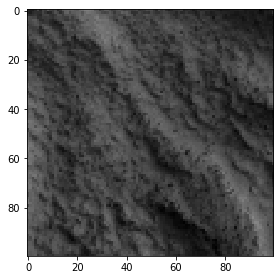

In [10]:
io.imshow(Xtrain[9100])
print(Ytrain[9100])

dusty


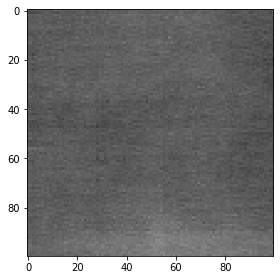

In [11]:
io.imshow(Xtrain[1100])
print(Ytrain[1100])

In [12]:
print(np.max(Xtrain)-np.min(Xtrain), np.max(Xtest)-np.min(Xtest), np.max(Xval)-np.min(Xval))

255 255 255


In [13]:
random.seed(32)
rand_trainzip = list(zip(Xtrain,Ytrain))
rand_valzip = list(zip(Xval,Yval))
rand_testzip = list(zip(Xtest,Ytest))
random.shuffle(rand_trainzip)
random.shuffle(rand_valzip)
random.shuffle(rand_testzip)
Xtrain, Ytrain = zip(*rand_trainzip)
Xval, Yval = zip(*rand_valzip)
Xtest, Ytest = zip(*rand_testzip)

In [14]:
norm = np.max(Xtrain)-np.min(Xtrain)
for x in Xtrain:
  x = x/norm

for x in Xtest:
  x = x/norm

for x in Xval:
  x = x/norm

dusty


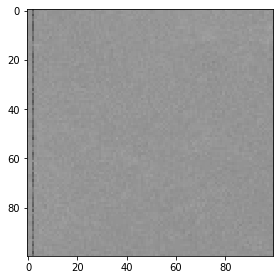

In [15]:
io.imshow(Xtrain[926])
print(Ytrain[926])

not_dusty


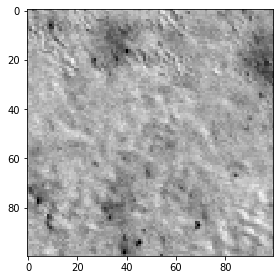

In [16]:
io.imshow(Xtrain[928])
print(Ytrain[928])

In [17]:
X_train = np.array(Xtrain)
Y_train = np.array(Ytrain)
X_val = np.array(Xval)
Y_val = np.array(Yval)
X_test = np.array(Xtest)
Y_test = np.array(Ytest)

In [18]:
TX_train = X_train 
TY_train = Y_train 
TX_val = X_val
TY_val = Y_val 
TX_test = X_test
TY_test = Y_test 

In [19]:
TX_train.shape

(9817, 100, 100)

In [20]:
#from skimage.transform import resize
#from PIL import Image
import cv2

Xtrain_tf_rn = []
Xtest_tf_rn = []
Xval_tf_rn = []


for i in range(len(TX_train)):
  res = cv2.resize(TX_train[i], dsize=(224, 224), interpolation=cv2.INTER_LINEAR)
  #res = np.expand_dims(res, axis=2)
  Xtrain_tf_rn.append(res)

for i in range(len(TX_test)):
  res = cv2.resize(TX_test[i], dsize=(224, 224), interpolation=cv2.INTER_LINEAR)
  #res = np.expand_dims(res, axis=2)
  Xtest_tf_rn.append(res)

for i in range(len(TX_val)):
  res = cv2.resize(TX_val[i], dsize=(224, 224), interpolation=cv2.INTER_LINEAR)
  #res = np.expand_dims(res, axis=2)
  Xval_tf_rn.append(res)

In [21]:
Xtrain_tf_rn = np.asarray(Xtrain_tf_rn)
Xtrain_tf_rn = np.repeat(Xtrain_tf_rn[:, :, :, np.newaxis], 3, axis=3)
Xtest_tf_rn = np.asarray(Xtest_tf_rn)
Xtest_tf_rn = np.repeat(Xtest_tf_rn[:, :, :, np.newaxis], 3, axis=3)
Xval_tf_rn = np.asarray(Xval_tf_rn)
Xval_tf_rn = np.repeat(Xval_tf_rn[:, :, :, np.newaxis], 3, axis=3)

In [22]:
# del TY_test, TY_train, TY_val, X_test, X_train, X_val
# del TX_test, TX_train, TX_val

In [23]:
Xtrain_tf_rn.shape

(9817, 224, 224, 3)

In [24]:
Xtrain_tf_rn.shape, Xtest_tf_rn.shape, Xval_tf_rn.shape

((9817, 224, 224, 3), (5214, 224, 224, 3), (4969, 224, 224, 3))

In [25]:
for i in range(len(Y_train)):
  if Y_train[i] == 'dusty':
    Y_train[i] = 1
  else:
    Y_train[i] = 0

for i in range(len(Y_test)):
  if Y_test[i] == 'dusty':
    Y_test[i] = 1
  else:
    Y_test[i] = 0

for i in range(len(Y_val)):
  if Y_val[i] == 'dusty':
    Y_val[i] = 1
  else:
    Y_val[i] = 0

In [26]:
type(Y_val[0])

numpy.str_

In [27]:
Y_train = Y_train.astype(np.float64)
Y_test = Y_test.astype(np.float64)
Y_val = Y_val.astype(np.float64)

In [28]:
from tensorflow import keras
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
from keras.models import Model
from keras.layers import Input 

In [29]:
train_dataset = tf.data.Dataset.from_tensor_slices((Xtrain_tf_rn, Y_train))
test_dataset = tf.data.Dataset.from_tensor_slices((Xtest_tf_rn, Y_test))
val_dataset = tf.data.Dataset.from_tensor_slices((Xval_tf_rn, Y_val))

In [30]:
BATCH_SIZE = 64
SHUFFLE_BUFFER_SIZE = 100

train_dataset = train_dataset.shuffle(SHUFFLE_BUFFER_SIZE).batch(BATCH_SIZE)
test_dataset = test_dataset.batch(BATCH_SIZE)
val_dataset = val_dataset.batch(BATCH_SIZE)

In [31]:
train_dataset

<BatchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.uint8, name=None), TensorSpec(shape=(None,), dtype=tf.float64, name=None))>

In [32]:
resnet50 = keras.applications.ResNet50(weights='imagenet', input_shape=(224, 224, 3), include_top='False') 

resnet50.trainable = False

resnet50.summary()

102967424/102967424 [==============================] - 5s 0us/step
Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                        

In [33]:
from tensorflow.keras import regularizers

model = models.Sequential()
model.add(resnet50)
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(64, activation='relu',kernel_regularizer=regularizers.l2(0.001)))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(2, activation='softmax'))

print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 1000)              25636712  
                                                                 
 flatten (Flatten)           (None, 1000)              0         
                                                                 
 dropout (Dropout)           (None, 1000)              0         
                                                                 
 dense (Dense)               (None, 64)                64064     
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 2)                 130       
                                                                 
Total params: 25,700,906
Trainable params: 64,194
Non-tr

In [34]:
for layer in resnet50.layers[:]:
   layer.trainable = False

In [35]:
for i, layer in enumerate(resnet50.layers):
   print(i, layer.name, layer.trainable)

0 input_1 False
1 conv1_pad False
2 conv1_conv False
3 conv1_bn False
4 conv1_relu False
5 pool1_pad False
6 pool1_pool False
7 conv2_block1_1_conv False
8 conv2_block1_1_bn False
9 conv2_block1_1_relu False
10 conv2_block1_2_conv False
11 conv2_block1_2_bn False
12 conv2_block1_2_relu False
13 conv2_block1_0_conv False
14 conv2_block1_3_conv False
15 conv2_block1_0_bn False
16 conv2_block1_3_bn False
17 conv2_block1_add False
18 conv2_block1_out False
19 conv2_block2_1_conv False
20 conv2_block2_1_bn False
21 conv2_block2_1_relu False
22 conv2_block2_2_conv False
23 conv2_block2_2_bn False
24 conv2_block2_2_relu False
25 conv2_block2_3_conv False
26 conv2_block2_3_bn False
27 conv2_block2_add False
28 conv2_block2_out False
29 conv2_block3_1_conv False
30 conv2_block3_1_bn False
31 conv2_block3_1_relu False
32 conv2_block3_2_conv False
33 conv2_block3_2_bn False
34 conv2_block3_2_relu False
35 conv2_block3_3_conv False
36 conv2_block3_3_bn False
37 conv2_block3_add False
38 conv2_bloc

In [36]:
opt = tf.keras.optimizers.Adam(3e-4)

In [37]:
model.compile(optimizer='Adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

print("model compiled")
print(model.summary())

model compiled
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 1000)              25636712  
                                                                 
 flatten (Flatten)           (None, 1000)              0         
                                                                 
 dropout (Dropout)           (None, 1000)              0         
                                                                 
 dense (Dense)               (None, 64)                64064     
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 2)                 130       
                                                                 
Total params: 25,700,906
Trainable params

In [38]:
model.fit(train_dataset, validation_data=val_dataset, epochs=10)

Epoch 1/10


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


154/154 [==============================] - 54s 272ms/step - loss: 0.5800 - accuracy: 0.8356 - val_loss: 0.3723 - val_accuracy: 0.9380
Epoch 2/10
154/154 [==============================] - 40s 261ms/step - loss: 0.3793 - accuracy: 0.9009 - val_loss: 0.2743 - val_accuracy: 0.9457
Epoch 3/10
154/154 [==============================] - 48s 310ms/step - loss: 0.3396 - accuracy: 0.9103 - val_loss: 0.2499 - val_accuracy: 0.9453
Epoch 4/10
154/154 [==============================] - 41s 268ms/step - loss: 0.3194 - accuracy: 0.9165 - val_loss: 0.2360 - val_accuracy: 0.9465
Epoch 5/10
154/154 [==============================] - 41s 266ms/step - loss: 0.3088 - accuracy: 0.9183 - val_loss: 0.2292 - val_accuracy: 0.9455
Epoch 6/10
154/154 [==============================] - 42s 272ms/step - loss: 0.2950 - accuracy: 0.9256 - val_loss: 0.2209 - val_accuracy: 0.9463
Epoch 7/10
154/154 [==============================] - 43s 280ms/step - loss: 0.2925 - accuracy: 0.9236 - val_loss: 0.2171 - val_accuracy: 0.9

In [39]:
model.evaluate(test_dataset)

82/82 [==============================] - 16s 198ms/step - loss: 0.2815 - accuracy: 0.9405


[0.28146153688430786, 0.9405446648597717]

In [40]:
print("Generate predictions for 3 samples")
predictions = model.predict(Xtrain_tf_rn[:3])
print("predictions shape:", predictions.shape)

Generate predictions for 3 samples
1/1 [==============================] - 1s 1s/step
predictions shape: (3, 2)


In [41]:
predictions

array([[6.3518241e-02, 9.3648171e-01],
       [9.9861968e-01, 1.3803652e-03],
       [9.9971539e-01, 2.8460176e-04]], dtype=float32)

0


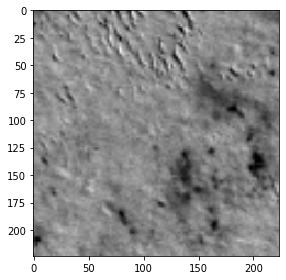

In [42]:
io.imshow(Xtrain_tf_rn[2],cmap='gray')
preds = tf.argmax(predictions[2])
tf.print(preds)

0


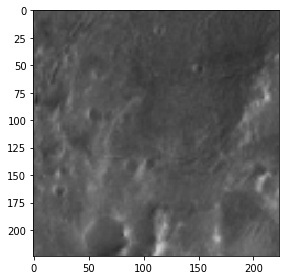

In [43]:
io.imshow(Xtrain_tf_rn[1],cmap='gray')
preds = tf.argmax(predictions[1])
tf.print(preds)

1


/usr/local/lib/python3.7/dist-packages/skimage/io/_plugins/matplotlib_plugin.py:150: UserWarning: Low image data range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


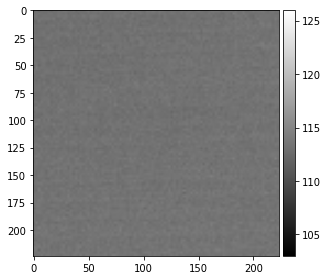

In [44]:
io.imshow(Xtrain_tf_rn[0],cmap='gray')
preds = tf.argmax(predictions[0])
tf.print(preds)

In [45]:
model.save('AtmosphericDustResNet50FineTune.h5')

In [46]:
!ls -l --block-size=M

total 102M
-rw-r--r-- 1 root root 99M Nov 20 03:11 AtmosphericDustResNet50FineTune.h5
drwxr-xr-x 2 root root  1M Oct 16  2019 dusty
-rw-r--r-- 1 root root  1M Oct 16  2019 manifest.csv
drwxr-xr-x 2 root root  1M Oct 16  2019 not_dusty
-rw-r--r-- 1 root root  1M Oct 16  2019 vetting_labels.csv


In [47]:
!cp AtmosphericDustResNet50FineTune.h5 /content/drive/MyDrive

In [48]:
loaded_model = tf.keras.models.load_model('AtmosphericDustResNet50FineTune.h5')
loaded_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 1000)              25636712  
                                                                 
 flatten (Flatten)           (None, 1000)              0         
                                                                 
 dropout (Dropout)           (None, 1000)              0         
                                                                 
 dense (Dense)               (None, 64)                64064     
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 2)                 130       
                                                                 
Total params: 25,700,906
Trainable params: 64,194
Non-tr

In [49]:
from PIL import Image
import glob
p = '/content/dataset/rdr_nomap_browse/dusty/'
curr_dir = os.getcwd()
pred_list = []
for x in glob.glob(p+'*.png'):
  img=Image.open(x)
  pred_list.append(img)

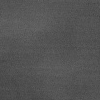

In [50]:
pred_list[0]

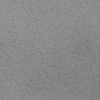

In [51]:
pred_list[100]

In [52]:
pilImg_list = []
for i in range(len(pred_list)):
  pilImg_list.append(np.asarray(pred_list[0]))

In [53]:
img_arr = np.array(pilImg_list)

In [54]:
print(type(pilImg_list),type(img_arr))

<class 'list'> <class 'numpy.ndarray'>


In [55]:
img_arr[0].shape

(100, 100)

In [56]:
img_arr_rn = []
for i in range(len(img_arr)):
  res = cv2.resize(img_arr[i], dsize=(224, 224), interpolation=cv2.INTER_LINEAR)
  img_arr_rn.append(res)

# from skimage.transform import resize
# img_arr_rn = []
# for x in img_arr:
#   val = np.expand_dims(x, axis=2)
#   img_arr_rn.append(resize(val, (224, 224, 1)))

In [57]:
pred_arr = np.array(img_arr_rn)

In [58]:
pred_arr.shape

(10000, 224, 224)

In [59]:
pred_arr = np.repeat(pred_arr[:, :, :, np.newaxis], 3, axis=3)

In [60]:
pred_arr.shape

(10000, 224, 224, 3)

1/1 [==============================] - 1s 883ms/step
Class is: 1


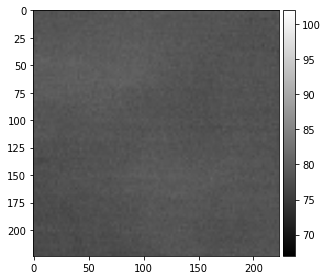

In [61]:
predictions = model.predict(pred_arr[0:10])
io.imshow(pred_arr[0],cmap='gray')
preds = tf.argmax(predictions[0])
tf.print(f'Class is: {preds}')

Class is: 1


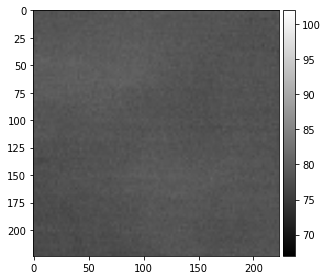

In [62]:
io.imshow(pred_arr[7],cmap='gray')
preds = tf.argmax(predictions[7])
tf.print(f'Class is: {preds}')